## Section 0: Setup

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme(color_codes = True)
sns.set_palette('Pastel1')
import matplotlib.pyplot as plt

In [2]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from scipy.stats import levene, ttest_ind

In [3]:
data1 = pd.read_csv('344582299_122019_4415_airline_delay_causes.csv')
data1.isnull().sum()

year                     0
month                    0
carrier                  0
carrier_name             0
airport                  0
airport_name             0
arr_flights            135
arr_del15              156
carrier_ct             135
weather_ct             135
nas_ct                 135
security_ct            135
late_aircraft_ct       135
arr_cancelled          135
arr_diverted           135
arr_delay              135
carrier_delay          135
weather_delay          135
nas_delay              135
security_delay         135
late_aircraft_delay    135
dtype: int64

In [4]:
data1.loc[data1['arr_flights'].isna()]

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
180,2019,1,OO,SkyWest Airlines Inc.,BMI,"Bloomington/Normal, IL: Central Il Regional Ai...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
463,2019,1,UA,United Air Lines Inc.,MKE,"Milwaukee, WI: General Mitchell International",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
650,2019,1,YV,Mesa Airlines Inc.,MDT,"Harrisburg, PA: Harrisburg International",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4293,2019,4,9E,Endeavor Air Inc.,TRI,"Bristol/Johnson City/Kingsport, TN: Tri Cities",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4734,2019,4,EV,ExpressJet Airlines LLC,LNK,"Lincoln, NE: Lincoln Airport",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121807,2018,10,9E,Endeavor Air Inc.,VLD,"Valdosta, GA: Valdosta Regional",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
122799,2018,10,OO,SkyWest Airlines Inc.,AEX,"Alexandria, LA: Alexandria International",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
122872,2018,10,OO,SkyWest Airlines Inc.,EWN,"New Bern/Morehead/Beaufort, NC: Coastal Caroli...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
122881,2018,10,OO,SkyWest Airlines Inc.,FSM,"Fort Smith, AR: Fort Smith Regional",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data1 = data1.loc[~data1['arr_flights'].isna()]
data1.isnull().sum()

year                    0
month                   0
carrier                 0
carrier_name            0
airport                 0
airport_name            0
arr_flights             0
arr_del15              21
carrier_ct              0
weather_ct              0
nas_ct                  0
security_ct             0
late_aircraft_ct        0
arr_cancelled           0
arr_diverted            0
arr_delay               0
carrier_delay           0
weather_delay           0
nas_delay               0
security_delay          0
late_aircraft_delay     0
dtype: int64

In [6]:
data1.loc[data1['arr_del15'].isna(),['carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct']]

,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct
251,0.0,0.0,0.0,0.0,0.0
1138,0.0,0.0,0.0,0.0,0.0
2999,0.0,0.0,0.0,0.0,0.0
3043,0.0,0.0,0.0,0.0,0.0
19625,0.0,0.0,0.0,0.0,0.0
24927,0.0,0.0,0.0,0.0,0.0
40689,0.0,0.0,0.0,0.0,0.0
42788,0.0,0.0,0.0,0.0,0.0
50342,0.0,0.0,0.0,0.0,0.0
67170,0.0,0.0,0.0,0.0,0.0


In [7]:
data1.fillna(0, inplace = True)
data1.isnull().sum()

year                   0
month                  0
carrier                0
carrier_name           0
airport                0
airport_name           0
arr_flights            0
arr_del15              0
carrier_ct             0
weather_ct             0
nas_ct                 0
security_ct            0
late_aircraft_ct       0
arr_cancelled          0
arr_diverted           0
arr_delay              0
carrier_delay          0
weather_delay          0
nas_delay              0
security_delay         0
late_aircraft_delay    0
dtype: int64

In [8]:
data2 = pd.read_csv('L_BUSY_AIRPORTS.csv')
data3 = pd.read_csv('772082719_T_CARRIER_DECODE.csv')
data4 = pd.read_csv('L_MARKETING_CARRIERS.csv')
data5 = pd.read_csv('L_CARRIER_HISTORY.csv')
data5.isnull().sum()

carrier     0
start       0
end        17
dtype: int64

In [9]:
data5.fillna(2021, inplace = True)
data5['establishment'] = data5['end'] - data5['start']
data5.isnull().sum()

carrier          0
start            0
end              0
establishment    0
dtype: int64

In [10]:
data = data1.merge(data2, on = ['airport', 'airport_name'])
data = data.merge(data3, on = ['carrier'])
data = data.merge(data4, on = ['carrier'])
data = data.merge(data5, on = ['carrier'])
data['arr_on_time'] = data['arr_flights'] - data['arr_del15'] - data['arr_cancelled'] - data['arr_diverted']
data['arr_del_rate'] = data['arr_del15']/data['arr_flights']
data.shape

(123761, 29)

In [11]:
data.isnull().sum()

year                   0
month                  0
carrier                0
carrier_name           0
airport                0
airport_name           0
arr_flights            0
arr_del15              0
carrier_ct             0
weather_ct             0
nas_ct                 0
security_ct            0
late_aircraft_ct       0
arr_cancelled          0
arr_diverted           0
arr_delay              0
carrier_delay          0
weather_delay          0
nas_delay              0
security_delay         0
late_aircraft_delay    0
busy                   0
carrier_group          0
marketing              0
start                  0
end                    0
establishment          0
arr_on_time            0
arr_del_rate           0
dtype: int64

In [12]:
data.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_delay,late_aircraft_delay,busy,carrier_group,marketing,start,end,establishment,arr_on_time,arr_del_rate
0,2019,1,MQ,Envoy Air,SAV,"Savannah, GA: Savannah/Hilton Head International",65.0,15.0,3.41,0.71,...,0.0,263.0,0,3,0,1991,2021.0,30.0,48.0,0.230769
1,2019,2,MQ,Envoy Air,SAV,"Savannah, GA: Savannah/Hilton Head International",60.0,12.0,5.52,0.68,...,0.0,222.0,0,3,0,1991,2021.0,30.0,47.0,0.200000
2,2019,3,MQ,Envoy Air,SAV,"Savannah, GA: Savannah/Hilton Head International",72.0,13.0,2.38,0.14,...,0.0,228.0,0,3,0,1991,2021.0,30.0,59.0,0.180556
3,2019,4,MQ,Envoy Air,SAV,"Savannah, GA: Savannah/Hilton Head International",68.0,12.0,1.74,1.34,...,0.0,384.0,0,3,0,1991,2021.0,30.0,54.0,0.176471
4,2019,5,MQ,Envoy Air,SAV,"Savannah, GA: Savannah/Hilton Head International",70.0,15.0,0.75,2.84,...,0.0,277.0,0,3,0,1991,2021.0,30.0,54.0,0.214286


Airport information:

carrier: Airline code.

carrier_name: Airline name.

airport: Airport code.

airport_name: Airport name.


Airport statistics:

arr_flights: Number of flights which arrived at the airport.

arr_del15: Number of flights delayed (>= 15minutes late).

carrier_ct: Number of flights delayed due to air carrier (e.g. maintenance or crew problems, aircraft cleaning, baggage loading, fueling, etc.).

weather_ct: Number of flights delayed due to weather.

nas_ct: Number of flights delayed due to National Aviation System (e.g. non-extreme weather conditions, airport operations, heavy traffic volume, and air traffic control).

security_ct: Number of flights delayed due to security (e.g. evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas).

late_aircraft_ct: Number of flights delayed due to a previous flight using the same aircraft being late.

arr_cancelled: Number of cancelled flights.

arr_diverted: Number of diverted flights.

arr_delay: Total time (minutes) of delayed flights.

carrier_delay: Total time (minutes) of delayed flights due to air carrier.

weather_delay: Total time (minutes) of delayed flights due to weather.

nas_delay: Total time (minutes) of delayed flights due to National Aviation System.

security_delay: Total time (minutes) of delayed flights due to security.

late_aircraft_delay: Total time (minutes) of delayed flights due to a previous flight using the same aircraft being late.

arr_flights arr_del15 carrier_ct weather_ct nas_ct security_ct late_aircraft_ct arr_cancelled arr_diverted arr_delay carrier_delay weather_delay nas_delay security_delay late_aircraft_delay arr_on_time

## Section 1: Dataset Additional Information

In [13]:
len(np.unique(data['carrier']))

20

In [14]:
np.unique(data['carrier'])

array(['9E', 'AA', 'AS', 'B6', 'DL', 'EV', 'F9', 'FL', 'G4', 'HA', 'MQ',
       'NK', 'OH', 'OO', 'UA', 'US', 'VX', 'WN', 'YV', 'YX'], dtype=object)

In [15]:
len(np.unique(data['carrier_name']))

23

In [16]:
np.unique(data['carrier_name'])

array(['AirTran Airways Corporation', 'Alaska Airlines Inc.',
       'Allegiant Air', 'American Airlines Inc.',
       'American Eagle Airlines Inc.', 'Delta Air Lines Inc.',
       'Endeavor Air Inc.', 'Envoy Air', 'ExpressJet Airlines Inc.',
       'ExpressJet Airlines LLC', 'Frontier Airlines Inc.',
       'Hawaiian Airlines Inc.', 'JetBlue Airways', 'Mesa Airlines Inc.',
       'PSA Airlines Inc.', 'Pinnacle Airlines Inc.', 'Republic Airline',
       'SkyWest Airlines Inc.', 'Southwest Airlines Co.',
       'Spirit Air Lines', 'US Airways Inc.', 'United Air Lines Inc.',
       'Virgin America'], dtype=object)

In [17]:
len(np.unique(data['airport']))

375

In [18]:
len(np.unique(data['airport_name']))

375

30 major airports: ATL, BWI, BOS, CLT, MDW, ORD, DFW, DEN, DTW, FLL, HNL, IAH, LAS, LAX, MIA, MSP, JFK, LGA, EWR, MCO, PHL, PHX, PDX, SLC, SAN, SFO, SEA, TPA, DCA, IAD.

## Section 2:  On-Time Arrival Performance

### 2.0: General Statistics

In [19]:
df1 = pd.DataFrame(data[['arr_on_time', 'arr_del15', 'arr_cancelled', 'arr_diverted']].sum(), columns = ['Number of Flights which Arrived at the Airport'])
df2 = pd.DataFrame(data[['arr_on_time', 'arr_del15', 'arr_cancelled', 'arr_diverted']].sum()/data['arr_flights'].sum(), columns = ['Percentage of Total Number of Flights which Arrived at the Airport'])
tab1 = df1.merge(df2, left_index = True, right_index = True)
tab1.set_index([['Number of On-time Flights', 'Number of Flights Delayed', 'Number of Cancelled Flights', 'Number of Diverted Flights']], inplace = True)
tab1

,Number of Flights which Arrived at the Airport,Percentage of Total Number of Flights which Arrived at the Airport
Number of On-time Flights,39797777.0,0.795432
Number of Flights Delayed,9324078.0,0.186359
Number of Cancelled Flights,791805.0,0.015826
Number of Diverted Flights,119236.0,0.002383


In [20]:
df3 = pd.DataFrame(data[['carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct']].sum(), columns = ['Number of Flights Delayed'])
df4 = pd.DataFrame(data[['carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct']].sum()/data['arr_del15'].sum(), columns = ['Percentage of Total Flights Delayed'])
tab2a = df3.merge(df4, left_index = True, right_index = True)
tab2a.set_index([['Delayed Flights due to Air Carrier', 'Delayed Flights due to Weather', 'Delayed Flights due to National Aviation System', 'Delayed Flights due to Security', 'Delayed Flights due to a Previous Flight using the Same Aircraft Being Late']], inplace = True)

df5 = pd.DataFrame(data[['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']].sum(), columns = ['Time (Minutes) of Delayed Flights'])
df6 = pd.DataFrame(data[['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']].sum()/data['arr_delay'].sum(), columns = ['Percentage of Total Time (Minutes) of Delayed Flights'])
tab2b = df5.merge(df6, left_index = True, right_index = True)
tab2b.set_index([['Delayed Flights due to Air Carrier', 'Delayed Flights due to Weather', 'Delayed Flights due to National Aviation System', 'Delayed Flights due to Security', 'Delayed Flights due to a Previous Flight using the Same Aircraft Being Late']], inplace = True)

tab2 = tab2a.merge(tab2b, left_index = True, right_index = True)
tab2

,Number of Flights Delayed,Percentage of Total Flights Delayed,Time (Minutes) of Delayed Flights,Percentage of Total Time (Minutes) of Delayed Flights
Delayed Flights due to Air Carrier,2665509.81,0.285874,176454698.0,0.309071
Delayed Flights due to Weather,287638.02,0.030849,26950283.0,0.047205
Delayed Flights due to National Aviation System,2880620.24,0.308944,136315692.0,0.238765
Delayed Flights due to Security,16666.99,0.001788,759148.0,0.001330
Delayed Flights due to a Previous Flight using the Same Aircraft Being Late,3473649.23,0.372546,230439950.0,0.403629


### 2.1: By Year (General)

[Text(0, 0, '17.34'),
 Text(0, 0, '20.82'),
 Text(0, 0, '22.02'),
 Text(0, 0, '19.04'),
 Text(0, 0, '16.98'),
 Text(0, 0, '18.14'),
 Text(0, 0, '19.50'),
 Text(0, 0, '19.54')]

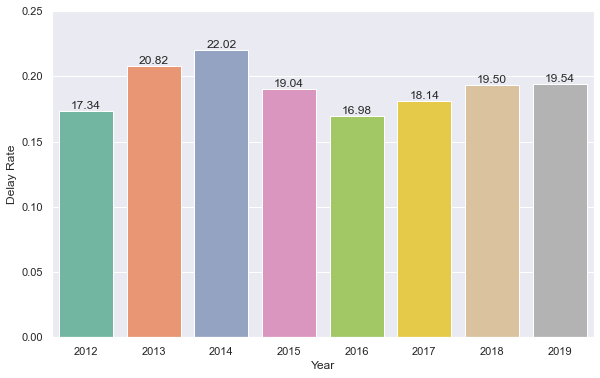

In [21]:
del_year = data[['year', 'arr_del_rate']].groupby('year').mean().reset_index()

fig, ax = plt.subplots(figsize = (9.7, 6))
#fig, ax = plt.subplots(figsize = (4.85, 3))
plot = sns.barplot(x = 'year', y = 'arr_del_rate', data = del_year, palette = 'Set2')
ax.set_xlabel('Year')
ax.set_ylabel('Delay Rate')
ax.set_ylim(0, 0.25) 
plot.bar_label(plot.containers[0], labels = ['17.34', '20.82', '22.02', '19.04', '16.98', '18.14', '19.50', '19.54'])

### 2.2: By Month (General)

Text(0, 0.5, 'Delay Rate')

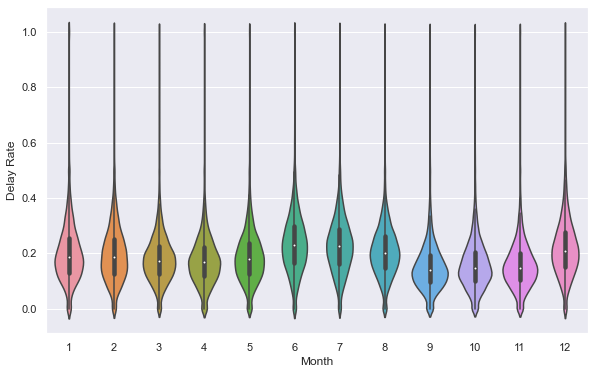

In [22]:
del_month = data[['month', 'arr_del_rate']]

fig, ax = plt.subplots(figsize = (9.7, 6))
sns.violinplot(x = 'month', y = 'arr_del_rate', data = del_month)
ax.set_xlabel('Month')
ax.set_ylabel('Delay Rate')

Text(0, 0.5, 'Delay Rate')

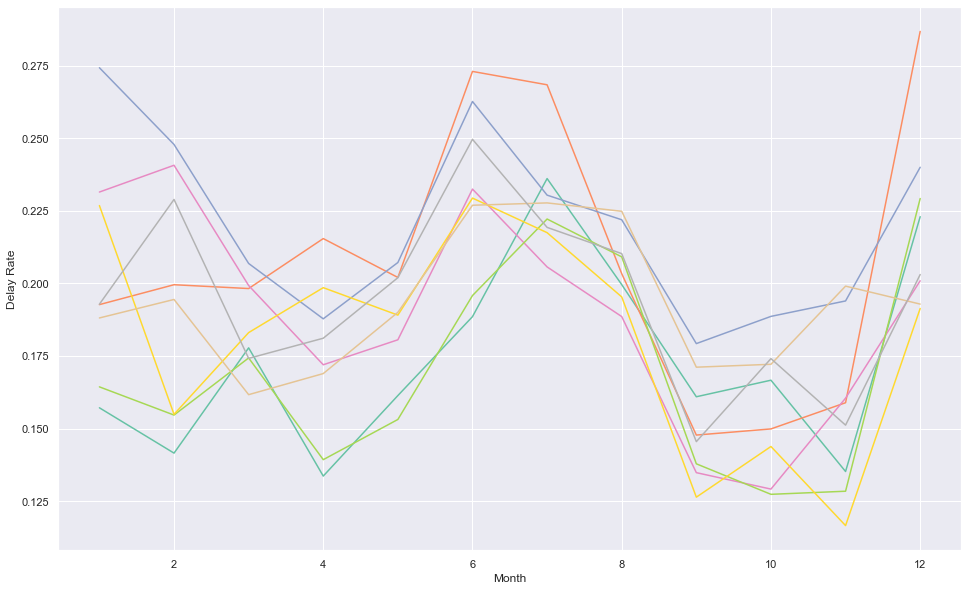

In [23]:
del_year_month = data[['year', 'month', 'arr_del_rate']].groupby(['year', 'month']).mean().reset_index()

fig, ax = plt.subplots(figsize = (16.18, 10))
#fig, ax = plt.subplots(figsize = (4.85, 3))
sns.lineplot(x = 'month', y = 'arr_del_rate', hue = 'year', data = del_year_month, palette = 'Set2', legend = False)
ax.set_xlabel('Month')
ax.set_ylabel('Delay Rate')

In [24]:
del_year_month

,year,month,arr_del_rate
0,2012,1,0.157136
1,2012,2,0.141524
2,2012,3,0.177775
3,2012,4,0.133620
4,2012,5,0.161345
...,...,...,...
91,2019,8,0.210232
92,2019,9,0.145480
93,2019,10,0.174070
94,2019,11,0.151159


### 2.3: By Flight Status

In [25]:
del_status = pd.DataFrame(data[['arr_on_time', 'late_aircraft_ct', 'nas_ct', 'carrier_ct', 'arr_cancelled', 'weather_ct', 'arr_diverted', 'security_ct']].sum()/data['arr_flights'].sum(), columns = ['flight_status']).transpose()
del_status.set_axis(['On Time', 'Aircraft Arriving Late', 'National Aviation System Delay', 'Air Carrier Delay', 'Cancelled', 'Weather Delay', 'Diverted', 'Security Delay'], axis = 1, inplace = True)
with pd.option_context('display.float_format', '{:,.2%}'.format): 
    print(del_status)

               On Time  Aircraft Arriving Late  \
flight_status   79.54%                   6.94%   

               National Aviation System Delay  Air Carrier Delay  Cancelled  \
flight_status                           5.76%              5.33%      1.58%   

               Weather Delay  Diverted  Security Delay  
flight_status          0.57%     0.24%           0.03%  


(0.0, 0.86)

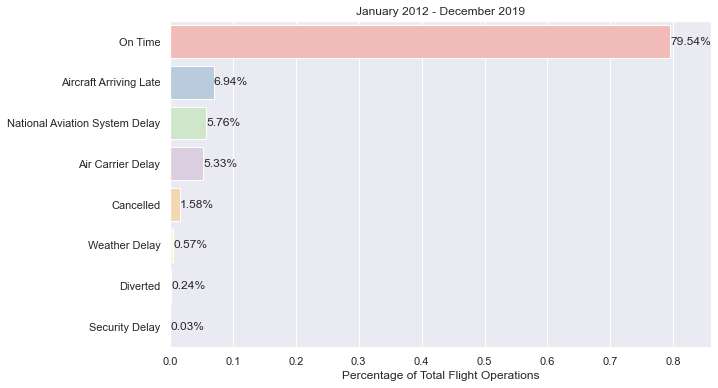

In [26]:
fig, ax = plt.subplots(figsize = (9.7, 6))
plot = sns.barplot(data = del_status, orient = 'h')
plot.bar_label(plot.containers[0], labels = ['79.54%', '6.94%', '5.76%', '5.33%', '1.58%', '0.57%', '0.24%', '0.03%'])
ax.set_title('January 2012 - December 2019')
ax.set(xlabel = 'Percentage of Total Flight Operations')
ax.set_xlim([0, 0.86])

### 2.4: By Busiest and Less Busy Airport  (Year)

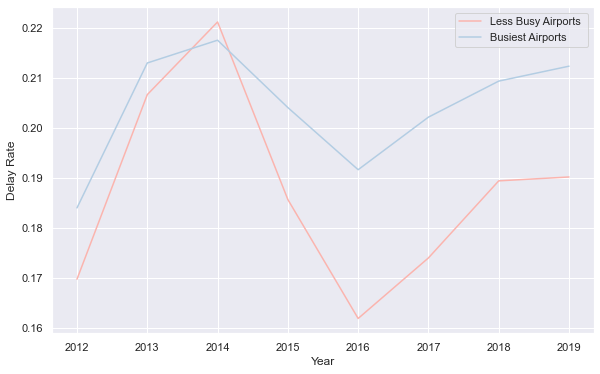

In [27]:
busy_year = data[['year', 'arr_del_rate', 'busy']].groupby(['year', 'busy']).mean().reset_index()

fig, ax = plt.subplots(figsize = (9.7, 6))
sns.lineplot(x = 'year', y = 'arr_del_rate', hue = 'busy', data = busy_year)
ax.set_xlabel('Year')
ax.set_ylabel('Delay Rate')
ax.legend(labels = ['Less Busy Airports ', 'Busiest Airports'])

In [28]:
busy_year

,year,busy,arr_del_rate
0,2012,0,0.169685
1,2012,1,0.183938
2,2013,0,0.206582
3,2013,1,0.212915
4,2014,0,0.221117
5,2014,1,0.217472
6,2015,0,0.185616
7,2015,1,0.204002
8,2016,0,0.161833
9,2016,1,0.191578


### 2.5: By Busiest and Less Busy Airport  (Month)

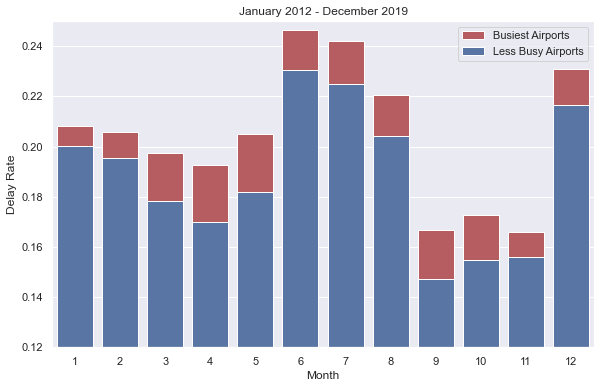

In [29]:
busy_month = data[['month', 'arr_del_rate', 'busy']].groupby(['month', 'busy']).mean().reset_index()

fig, ax = plt.subplots(figsize = (9.7, 6))
sns.barplot(x = busy_month['month'], y = busy_month[busy_month['busy'] == 1]['arr_del_rate'], label = 'Busiest Airports', color = 'r')
sns.barplot(x = busy_month['month'], y = busy_month[busy_month['busy'] == 0]['arr_del_rate'], label = 'Less Busy Airports', color = 'b')
ax.set_title('January 2012 - December 2019')
ax.set_xlabel('Month')
ax.set_ylabel('Delay Rate')
ax.set_ylim(0.12, 0.25)
ax.legend()

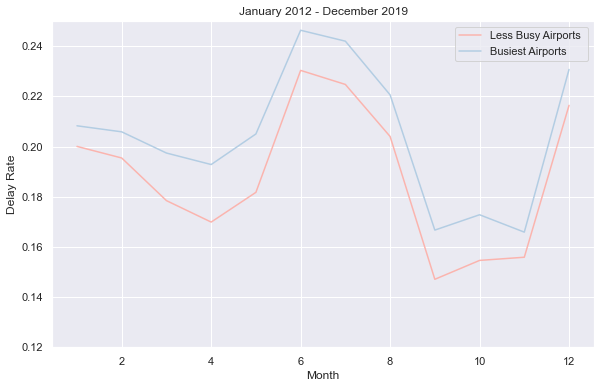

In [30]:
fig, ax = plt.subplots(figsize = (9.7, 6))
#fig, ax = plt.subplots(figsize = (4.85, 3))

sns.lineplot(x = 'month', y = 'arr_del_rate', hue = 'busy', data = busy_month)
ax.set_title('January 2012 - December 2019')
ax.set_xlabel('Month')
ax.set_ylabel('Delay Rate')
ax.set_ylim(0.12, 0.25)
ax.legend(labels = ['Less Busy Airports ', 'Busiest Airports'])

In [31]:
busy_month

,month,busy,arr_del_rate
0,1,0,0.200078
1,1,1,0.208289
2,2,0,0.195451
3,2,1,0.205879
4,3,0,0.178464
5,3,1,0.197430
6,4,0,0.169908
7,4,1,0.192847
8,5,0,0.181763
9,5,1,0.205037


In [32]:
(busy_month[busy_month['busy']==1].reset_index()-busy_month[busy_month['busy']==0].reset_index())['arr_del_rate'].mean()

0.016314490741123348

### 2.6: By Carriers (General)

In [33]:
del_status = pd.DataFrame(data[['arr_on_time', 'late_aircraft_ct', 'nas_ct', 'carrier_ct', 'arr_cancelled', 'weather_ct', 'arr_diverted', 'security_ct']].sum()/data['arr_flights'].sum(), columns = ['delay_status']).transpose()
del_status.set_axis(['On Time', 'Aircraft Arriving Late', 'National Aviation System Delay', 'Air Carrier Delay', 'Cancelled', 'Weather Delay', 'Diverted', 'Security Delay'], axis = 1, inplace = True)
with pd.option_context('display.float_format', '{:,.2%}'.format): 
    print(del_status)

              On Time  Aircraft Arriving Late  National Aviation System Delay  \
delay_status   79.54%                   6.94%                           5.76%   

              Air Carrier Delay  Cancelled  Weather Delay  Diverted  \
delay_status              5.33%      1.58%          0.57%     0.24%   

              Security Delay  
delay_status           0.03%  


In [34]:
df7 = data[['carrier', 'arr_flights']].groupby('carrier').sum()
df8 = data[['carrier', 'arr_del15']].groupby('carrier').sum()
flight_total = df7.merge(df8, left_index = True, right_index = True)
carrier_del = pd.DataFrame(flight_total['arr_del15']/flight_total['arr_flights'], columns = ['carrier_del_rate']).transpose()
with pd.option_context('display.float_format', '{:,.2%}'.format): 
    print(carrier_del)

carrier              9E     AA     AS     B6     DL     EV     F9     FL  \
carrier_del_rate 17.38% 19.70% 14.52% 23.77% 13.86% 21.31% 24.61% 15.67%   

carrier              G4    HA     MQ     NK     OH     OO     UA     US  \
carrier_del_rate 21.22% 9.32% 20.93% 21.02% 19.71% 18.03% 19.61% 16.33%   

carrier              VX     WN     YV     YX  
carrier_del_rate 20.45% 19.47% 18.87% 18.38%  


Text(0, 0.5, 'Carrier')

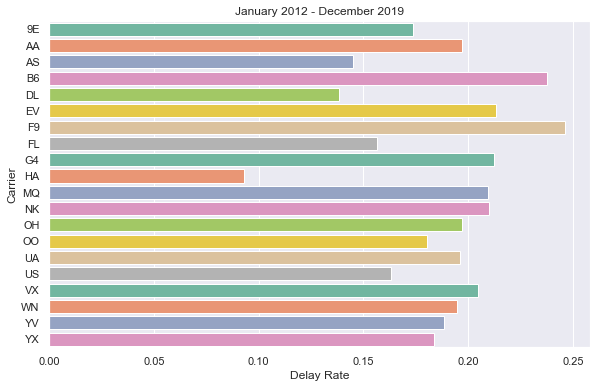

In [35]:
fig, ax = plt.subplots(figsize = (9.7, 6))
#fig, ax = plt.subplots(figsize = (4.85, 5))
sns.barplot(data = carrier_del, orient = 'h', palette = 'Set2')
ax.set_title('January 2012 - December 2019')
ax.set_xlabel('Delay Rate')
ax.set_ylabel('Carrier')

### 2.7: By National Carriers and Major Carriers

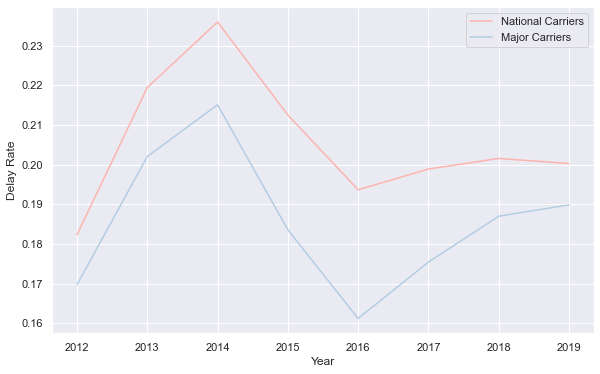

In [36]:
group_year = data[['year', 'arr_del_rate', 'carrier_group']].groupby(['year', 'carrier_group']).mean().reset_index()

fig, ax = plt.subplots(figsize = (9.7, 6))
#fig, ax = plt.subplots(figsize = (4.85, 3))
sns.lineplot(x = 'year', y = 'arr_del_rate', hue = 'carrier_group', data = group_year, palette = 'Pastel1')
ax.set_xlabel('Year')
ax.set_ylabel('Delay Rate')
ax.legend(labels = ['National Carriers', 'Major Carriers'])

In [37]:
group_year

,year,carrier_group,arr_del_rate
0,2012,2,0.182294
1,2012,3,0.169705
2,2013,2,0.219421
3,2013,3,0.202033
4,2014,2,0.235963
5,2014,3,0.215089
6,2015,2,0.212500
7,2015,3,0.183549
8,2016,2,0.193655
9,2016,3,0.161201


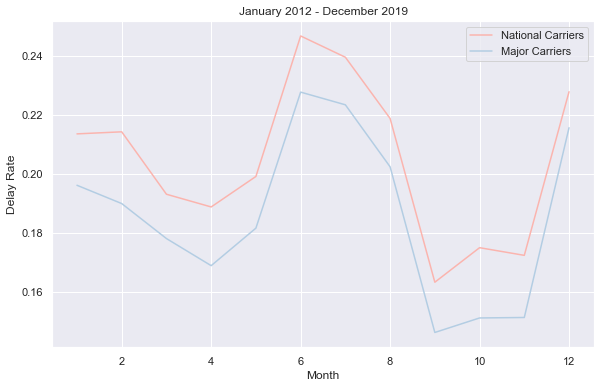

In [38]:
group_month = data[['month', 'arr_del_rate', 'carrier_group']].groupby(['month', 'carrier_group']).mean().reset_index()

fig, ax = plt.subplots(figsize = (9.7, 6))
#fig, ax = plt.subplots(figsize = (4.85, 3))
sns.lineplot(x = 'month', y = 'arr_del_rate', hue = 'carrier_group', data = group_month, palette = 'Pastel1')
ax.set_title('January 2012 - December 2019')
ax.set_xlabel('Month')
ax.set_ylabel('Delay Rate')
ax.legend(labels = ['National Carriers', 'Major Carriers'])

In [39]:
group_month

,month,carrier_group,arr_del_rate
0,1,2,0.213672
1,1,3,0.196211
2,2,2,0.214372
3,2,3,0.189993
4,3,2,0.193164
5,3,3,0.178105
6,4,2,0.188842
7,4,3,0.168894
8,5,2,0.199203
9,5,3,0.181644


In [40]:
(group_month[group_month['carrier_group'] == 2].reset_index() - group_month[group_month['carrier_group'] == 3].reset_index())['arr_del_rate'].mean()

0.018365302126379327

### 2.8: By Marketing Carriers and Regular Carriers

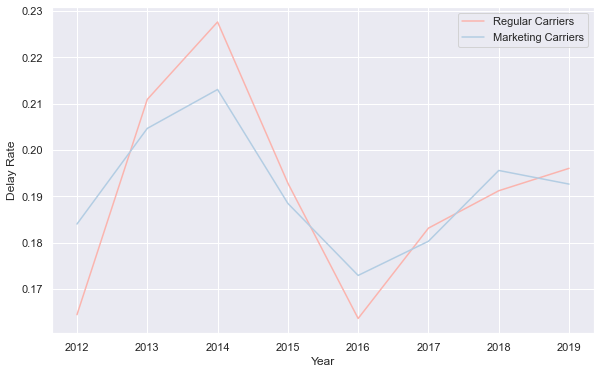

In [41]:
market_year = data[['year', 'arr_del_rate', 'marketing']].groupby(['year', 'marketing']).mean().reset_index()

fig, ax = plt.subplots(figsize = (9.7, 6))
#fig, ax = plt.subplots(figsize = (4.85, 3))
sns.lineplot(x = 'year', y = 'arr_del_rate', hue = 'marketing', data = market_year)
ax.set_xlabel('Year')
ax.set_ylabel('Delay Rate')
ax.legend(labels = ['Regular Carriers', 'Marketing Carriers'])

In [42]:
market_year

,year,marketing,arr_del_rate
0,2012,0,0.164463
1,2012,1,0.184029
2,2013,0,0.210925
3,2013,1,0.204672
4,2014,0,0.227650
5,2014,1,0.213076
6,2015,0,0.192865
7,2015,1,0.188493
8,2016,0,0.163649
9,2016,1,0.172941


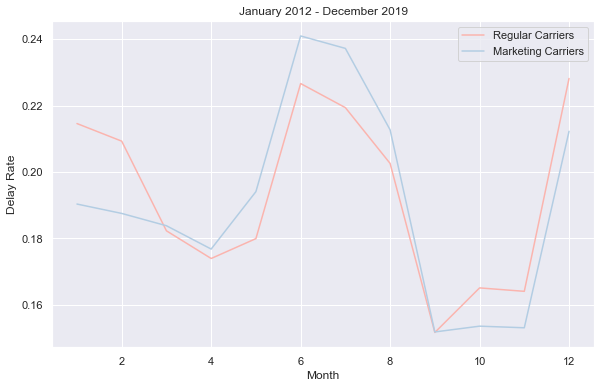

In [43]:
market_month = data[['month', 'arr_del_rate', 'marketing']].groupby(['month', 'marketing']).mean().reset_index()

fig, ax = plt.subplots(figsize = (9.7, 6))
#fig, ax = plt.subplots(figsize = (4.85, 3))
sns.lineplot(x = 'month', y = 'arr_del_rate', hue = 'marketing', data = market_month)
ax.set_title('January 2012 - December 2019')
ax.set_xlabel('Month')
ax.set_ylabel('Delay Rate')
ax.legend(labels = ['Regular Carriers', 'Marketing Carriers'])

In [44]:
market_month

,month,marketing,arr_del_rate
0,1,0,0.214619
1,1,1,0.190368
2,2,0,0.209314
3,2,1,0.187543
4,3,0,0.182305
5,3,1,0.183834
6,4,0,0.173966
7,4,1,0.176809
8,5,0,0.179952
9,5,1,0.194106


### 2.9: By Establishment Years

Text(0, 0.5, 'Delay Rate')

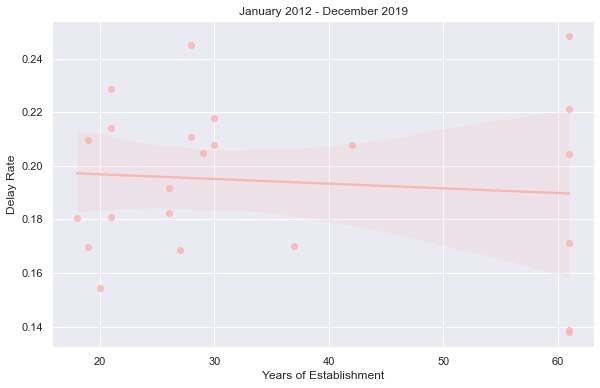

In [45]:
delay_estab = data[['carrier_name', 'arr_del_rate', 'establishment']].groupby(['carrier_name', 'establishment']).mean().reset_index()

fig, ax = plt.subplots(figsize = (9.7, 6))
#fig, ax = plt.subplots(figsize = (4.85, 3))
sns.regplot(x = 'establishment', y = 'arr_del_rate', data = delay_estab)
ax.set_title('January 2012 - December 2019')
ax.set_xlabel('Years of Establishment')
ax.set_ylabel('Delay Rate')

In [46]:
delay_estab

,carrier_name,establishment,arr_del_rate
0,AirTran Airways Corporation,20.0,0.154388
1,Alaska Airlines Inc.,61.0,0.137768
2,Allegiant Air,21.0,0.181025
3,American Airlines Inc.,61.0,0.221158
4,American Eagle Airlines Inc.,30.0,0.217733
5,Delta Air Lines Inc.,61.0,0.138723
6,Endeavor Air Inc.,19.0,0.169878
7,Envoy Air,30.0,0.207737
8,ExpressJet Airlines Inc.,28.0,0.210743
9,ExpressJet Airlines LLC,28.0,0.245191


## Section 3: Modeling

### 3.1: Baseline Model

Multiple linear regression for predicting mins of delay. Logistic regression for predicting delay or not.

In [47]:
list(data.columns)

['year',
 'month',
 'carrier',
 'carrier_name',
 'airport',
 'airport_name',
 'arr_flights',
 'arr_del15',
 'carrier_ct',
 'weather_ct',
 'nas_ct',
 'security_ct',
 'late_aircraft_ct',
 'arr_cancelled',
 'arr_diverted',
 'arr_delay',
 'carrier_delay',
 'weather_delay',
 'nas_delay',
 'security_delay',
 'late_aircraft_delay',
 'busy',
 'carrier_group',
 'marketing',
 'start',
 'end',
 'establishment',
 'arr_on_time',
 'arr_del_rate']

Baseline model features: month, busy, carrier_group. Dependent variable: arr_delay. Next use lasso/ridge regression, random forest, neural network and time-series model.

In [48]:
X_base, y_base = data[['month', 'busy', 'carrier_group']], data['arr_delay']
X_base_train, X_base_test, y_base_train, y_base_test = train_test_split(X_base, y_base, test_size = 0.20, random_state = 123)

In [49]:
baseline = LinearRegression()
baseline.fit(X_base_train, y_base_train)
baseline_predict = baseline.predict(X_base_test)
1 - (1 - baseline.score(X_base_test, y_base_test))*(len(y_base_test) - 1)/(len(y_base_test) - X_base.shape[1] - 1)

0.13395013026581737

In [50]:
mean_squared_error(y_base_test, baseline_predict, squared = False)

12039.123779468266

In [51]:
mean_absolute_error(y_base_test, baseline_predict)

4800.4225550031415

### 3.2: Feature Selection

In [52]:
dummies_carrier = pd.get_dummies(data['carrier'])
dummies_airport = pd.get_dummies(data['airport'])
data6 = pd.concat([data, dummies_carrier, dummies_airport], axis = 1)
data6 = data6.drop(['arr_delay', 'carrier', 'carrier_name', 'airport', 'airport_name', 'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay'], axis = 1)

In [53]:
test = SelectKBest(score_func = f_regression, k = 5)
fit = test.fit(data6, data['arr_delay'])
np.set_printoptions(precision = 2, suppress = True)
fit.scores_

array([      5.96,       4.48,  462492.42, 2130145.31,  552173.94,
        232828.08,  714922.88,   32169.91,  753938.4 ,   93580.34,
        118528.33,   19776.46,     799.49,     928.71,     334.88,
            74.73,     350.88,  310827.52,    1102.11,      96.22,
           813.82,     308.04,      65.1 ,       0.68,      22.41,
           263.17,      44.09,     220.3 ,      97.88,     160.4 ,
             1.07,      21.53,     114.81,     248.16,      22.7 ,
            12.21,    2983.48,     156.61,      10.3 ,      29.97,
             4.71,      37.41,       9.71,       7.57,       4.68,
             7.25,       1.28,       0.33,      12.17,      11.12,
            12.49,      20.87,       3.  ,      50.73,       6.84,
            21.81,      15.46,       8.65,       3.25,       0.34,
          3537.48,      25.47,       0.8 ,       3.51,      28.62,
            24.54,       0.62,      18.61,      29.29,      10.36,
             2.15,       6.26,       0.91,       5.74,      22

In [54]:
fit.get_feature_names_out(input_features = None)

array(['arr_flights', 'arr_del15', 'carrier_ct', 'nas_ct',
       'late_aircraft_ct'], dtype=object)

In [55]:
X, y = data[['arr_flights', 'arr_del15', 'carrier_ct', 'nas_ct','late_aircraft_ct']], data['arr_delay']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 123)

### 3.3: Ridge Regression

In [56]:
ridge = Ridge()
ridge.fit(X_train, y_train)
ridge_y_predict = ridge.predict(X_test)
1 - (1 - ridge.score(X_test, y_test))*(len(y_test) - 1)/(len(y_test) - X.shape[1] - 1)

0.9471265760202732

In [57]:
mean_squared_error(y_test, ridge_y_predict, squared = False)

2974.572772282767

In [58]:
mean_absolute_error(y_test, ridge_y_predict)

871.1650933738302

In [59]:
ridge_alpha = [0.0001, 0.001, 0.1, 1.0]

ridge_grid = {'alpha': ridge_alpha}

In [60]:
ridge_rscv = Ridge()
ridge_random = RandomizedSearchCV(estimator = ridge_rscv, param_distributions = ridge_grid, cv = 5, random_state = 123, scoring = 'neg_root_mean_squared_error', n_jobs = -1)
ridge_random.fit(X_train, y_train)
ridge_random.best_params_

C:\Users\Gary\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'alpha': 0.0001}

In [61]:
ridge_best = Ridge(alpha = 0.001)
ridge_best.fit(X_train, y_train)
ridge_y_predict_best = ridge_best.predict(X_test)
1 - (1 - ridge_best.score(X_test, y_test))*(len(y_test) - 1)/(len(y_test) - X.shape[1] - 1)

0.9471265790818609

In [62]:
mean_squared_error(y_test, ridge_y_predict_best, squared = False)

2974.572686162794

In [63]:
mean_absolute_error(y_test, ridge_y_predict_best)

871.1651995988211

### 3.4: K-Nearest Neighbors (K-NN)

In [64]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
knn_y_predict = knn.predict(X_test)
1 - (1 - knn.score(X_test, y_test))*(len(y_test) - 1)/(len(y_test) - X.shape[1] - 1)

C:\Users\Gary\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\Gary\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


0.9465264292847799

In [65]:
mean_squared_error(y_test, knn_y_predict, squared = False)

2991.4067771732416

In [66]:
mean_absolute_error(y_test, knn_y_predict)

836.8092756433564

In [67]:
knn_n_neighbors = [int(x) for x in np.linspace(1, 30, 30)]
knn_leaf_size = [int(x) for x in np.linspace(1, 50, 50)]
knn_p = [1,2]

knn_grid = {'n_neighbors': knn_n_neighbors, 'leaf_size': knn_leaf_size, 'p': knn_p}

In [68]:
knn_rscv = KNeighborsRegressor()
knn_random = RandomizedSearchCV(estimator = knn_rscv, param_distributions = knn_grid, cv = 5, random_state = 123, scoring = 'neg_root_mean_squared_error', n_jobs = -1)
knn_random.fit(X_train, y_train)
knn_random.best_params_

{'p': 1, 'n_neighbors': 14, 'leaf_size': 23}

In [69]:
knn_best = KNeighborsRegressor(n_neighbors = 4, leaf_size = 20, p = 2)
knn_best.fit(X_train, y_train)
knn_y_predict_best = knn_best.predict(X_test)
1 - (1 - knn_best.score(X_test, y_test))*(len(y_test) - 1)/(len(y_test) - X.shape[1] - 1)

C:\Users\Gary\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\Gary\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


0.9479463090455227

In [70]:
mean_squared_error(y_test, knn_y_predict_best, squared = False)

2951.4242771791646

In [71]:
mean_absolute_error(y_test, knn_y_predict_best)

845.2751787662102

### 3.5: Neural Network (MLP)

In [72]:
nn = MLPRegressor()
nn.fit(X_train, y_train)
nn_y_predict = nn.predict(X_test)
1 - (1 - nn.score(X_test, y_test))*(len(y_test) - 1)/(len(y_test) - X.shape[1] - 1)

C:\Users\Gary\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.9511112596923887

In [73]:
mean_squared_error(y_test, nn_y_predict, squared = False)

2860.291557272731

In [74]:
mean_absolute_error(y_test, nn_y_predict)

826.3391016607532

In [75]:
nn_solver = ['sgd', 'adam']
nn_learning_rate = ['constant','adaptive']

nn_grid = {'solver': nn_solver, 'learning_rate': nn_learning_rate}

In [76]:
nn_rscv = MLPRegressor()
nn_random = RandomizedSearchCV(estimator = nn_rscv, param_distributions = nn_grid, cv = 5, random_state = 123, scoring = 'neg_root_mean_squared_error', n_jobs = -1)
nn_random.fit(X_train, y_train)
nn_random.best_params_

C:\Users\Gary\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'solver': 'adam', 'learning_rate': 'constant'}

In [77]:
nn_best = MLPRegressor(solver = 'adam', learning_rate = 'adaptive')
nn_best.fit(X_train, y_train)
nn_y_predict_best = nn_best.predict(X_test)
1 - (1 - nn_best.score(X_test, y_test))*(len(y_test) - 1)/(len(y_test) - X.shape[1] - 1)

0.9496324398889165

In [78]:
mean_squared_error(y_test, nn_y_predict_best, squared = False)

2903.2292941487412

In [79]:
mean_absolute_error(y_test, nn_y_predict_best)

823.5818271118702

## Section 4: Prediction

### 4.1: Model Prediction

In [80]:
data_pred = pd.read_csv('1063637876_82021_5125_airline_delay_causes.csv')
data_pred.isnull().sum()

year                   0
month                  0
carrier                0
carrier_name           0
airport                0
airport_name           0
arr_flights            3
arr_del15              3
carrier_ct             3
weather_ct             3
nas_ct                 3
security_ct            3
late_aircraft_ct       3
arr_cancelled          3
arr_diverted           3
arr_delay              3
carrier_delay          3
weather_delay          3
nas_delay              3
security_delay         3
late_aircraft_delay    3
dtype: int64

In [81]:
data_pred.shape

(1795, 21)

In [82]:
data_pred = data_pred.loc[~data_pred['arr_flights'].isna()]
X_pred = data_pred[['arr_flights', 'arr_del15', 'carrier_ct', 'nas_ct','late_aircraft_ct']]
y_pred = data_pred['arr_delay']

In [83]:
y_predict1 = ridge_best.predict(X_pred)
1 - (1 - ridge_best.score(X_pred, y_pred))*(len(y_pred) - 1)/(len(y_pred) - X_pred.shape[1] - 1)

0.9431697413828949

In [84]:
mean_squared_error(y_pred, y_predict1, squared = False)

2075.023399204504

In [85]:
mean_absolute_error(y_pred, y_predict1)

643.6480072678106

In [86]:
y_predict2 = knn_best.predict(X_pred)
1 - (1 - knn_best.score(X_pred, y_pred))*(len(y_pred) - 1)/(len(y_pred) - X_pred.shape[1] - 1)

C:\Users\Gary\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\Gary\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


0.9164597978567695

In [87]:
mean_squared_error(y_pred, y_predict2, squared = False)

2515.827981655315

In [88]:
mean_absolute_error(y_pred, y_predict2)

695.4222935267857

In [89]:
y_predict3 = nn_best.predict(X_pred)
1 - (1 - nn_best.score(X_pred, y_pred))*(len(y_pred) - 1)/(len(y_pred) - X_pred.shape[1] - 1)

0.912578123978968

In [90]:
mean_squared_error(y_pred, y_predict3, squared = False)

2573.6130093948937

In [91]:
mean_absolute_error(y_pred, y_predict3)

713.5345059829032

### 4.2: Prediction Difference Significance

In [92]:
levene(y_predict1, y_predict2).pvalue

0.6496126232752801

In [93]:
ttest_ind(y_predict1, y_predict2).pvalue

0.8873606937495402

In [94]:
levene(y_predict1, y_predict3).pvalue

0.8820494262034251

In [95]:
ttest_ind(y_predict1, y_predict3).pvalue

0.8931490647464905